# Analysis of the 2020 Ghanaian Presidential Election

# Introduction

The 2020 Ghanaian Presidential Election was a landmark democratic event, highlighting the nation's electoral process. This closely contested election was primarily between the two major political parties, the New Patriotic Party (NPP) and the National Democratic Congress (NDC), alongside minor parties. This report delves into the election results, analyzing vote distributions by regions, candidates, and parties. Through this analysis, we aim to uncover patterns that influenced the election outcomes, identify strongholds and swing regions, and assess the impact of minor parties. The comprehensive dataset includes regional vote counts for all participating candidates, offering a complete view of voter behavior.

# Problem Statement

Analyzing voting patterns and regional dynamics is crucial for refining political strategies and improving voter engagement. With over 13 million votes cast across 16 regions and 12 candidates, understanding regional disparities and the role of minor parties is critical. This study explores the vote gaps between NPP and NDC, identifies regional strongholds and swing areas, and evaluates the minor parties' influence on the overall results.

# Aim of the Project

The project aims to:

1. Analyze voter distribution across regions, parties, and candidates.
2. Identify vote disparities between NPP and NDC, as well as regional strongholds and weaknesses.
3. Highlight trends and performance of minor parties.
4. Provide actionable, data-driven recommendations for future electoral strategies.

# Exploratory Data Analysis Findings

1. General Statistics- Total votes cast: 13,119,460. Average votes per candidate-region pair: 68,435, with significant variability. NPP secured 6,730,587 votes (51.34%), NDC received 6,213,182 votes (47.36%), while minor parties collectively garnered 1.3%.

2. Regional Highlights- Highest turnout: Greater Accra (2,602,508 votes) and Ashanti (2,467,291 votes). Lowest turnout: Savannah Region (229,085 votes).

3. Party Performance NPP strongholds- Ashanti (1,798,751 votes) and Eastern (753,061 votes). NDC strongholds: Greater Accra (1,332,489 votes) and Volta (606,508 votes). Swing regions: Ahafo, North East, Western North, and Western showed competitive margins between NPP and NDC.

4. Minor Party Trends- Minor parties collectively secured 175,691 votes, with the Ghana Union Movement (GUM) leading at 105,548 votes (0.8%).

5. Vote Disparities- Largest NPP lead: Ashanti (+1.04M votes over NDC). Largest NDC lead: Greater Accra (+73,310 votes over NPP).

5. Correlation Analysis- Weak negative correlation (-0.32) between regions and vote totals suggests regional identity alone is not a strong predictor of voting patterns.

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# Loading data
data = pd.read_csv('~/Desktop/projects/ghana_2020_elections_data.csv')

data.head()

,candidate_no,presidential_candidate,party_initials,full_party_name,votes,region
0,1,Nana Addo Dankwa Akufo-Addo,NPP,New Patriotic Party,100481,Volta Region
1,2,John Dramani Mahama,NDC,National Democratic Congress,606508,Volta Region
2,3,Christian Kwabena Andrews,GUM,Ghana Union Movement,4679,Volta Region
3,4,Ivor Kobina Greenstreet,CPP,Convention People's Party,705,Volta Region
4,5,Akua Donkor,GFP,Ghana Freedom Party,180,Volta Region


In [54]:
# Displaying columns of data
data.columns

Index(['candidate_no', 'presidential_candidate', 'party_initials',
       'full_party_name', 'votes', 'region'],
      dtype='object')

In [55]:
# Identiying data types
data_types = data.dtypes
data_types

candidate_no               int64
presidential_candidate    object
party_initials            object
full_party_name           object
votes                      int64
region                    object
dtype: object

In [56]:
# Info on data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   candidate_no            192 non-null    int64 
 1   presidential_candidate  192 non-null    object
 2   party_initials          192 non-null    object
 3   full_party_name         192 non-null    object
 4   votes                   192 non-null    int64 
 5   region                  192 non-null    object
dtypes: int64(2), object(4)
memory usage: 9.1+ KB


In [57]:
# checking for duplication of data
data.duplicated().sum()

0

In [58]:
# Identifing No. of rows and colums of data
data.shape

(192, 6)

In [59]:
# Summary statistics of votes
data['votes'].describe().round(2)

count        192.00
mean       68330.52
std       220405.43
min           49.00
25%          264.50
50%          477.00
75%         1573.25
max      1795824.00
Name: votes, dtype: float64

In [60]:
# Total Number of votes
Total_votes = data['votes'].sum()
Total_votes

13119460

In [61]:
# Displaying names of presidencial candidates
data['presidential_candidate'].unique()

array(['Nana Addo Dankwa Akufo-Addo', 'John Dramani Mahama',
       'Christian Kwabena Andrews', 'Ivor Kobina Greenstreet',
       'Akua Donkor', 'Henry Herbert Lartey', 'Hassan Ayariga',
       'Percival Kofi Akpaloo', 'David Asibi Ayindenaba Apasera',
       'Brigitte Akosua Dzogbenuku', 'Nana Konadu Agyeman-Rawlings',
       'Alfred Kwame Asiedu Walker'], dtype=object)

In [62]:
# Displaying names of political parties
data['full_party_name'].unique()

array(['New Patriotic Party', 'National Democratic Congress',
       'Ghana Union Movement', "Convention People's Party",
       'Ghana Freedom Party', 'Great Consolidated Popular Party',
       "All People's Party", 'Liberal Party of Ghana',
       "People's National Convention", "Progressive People's Party",
       'National Democratic Party', 'Independent Candidate'], dtype=object)

In [63]:
# Displaying regions
data['region'].unique()

array(['Volta Region', 'Ahafo Region', 'Central Region',
       'North East Region', 'Upper West Region', 'Bono Region',
       'Oti Region', 'Upper East Region', 'Ashanti Region',
       'Savannah Region', 'Northern Region', 'Bono East Region',
       'Eastern Region', 'Western Region', 'Greater Accra Region',
       'Western North Region'], dtype=object)

In [64]:
# Count for null values in each column
nl_values=data.isnull().sum()
nl_values.to_frame('count')

,count
candidate_no,0
presidential_candidate,0
party_initials,0
full_party_name,0
votes,0
region,0


In [65]:
# Total votes per region
regional_votes = data.groupby('region')['votes'].sum().sort_values(ascending=False)
regional_votes

region
Greater Accra Region    2602508
Ashanti Region          2467291
Eastern Region          1236940
Central Region          1173439
Northern Region          897731
Western Region           863440
Volta Region             714947
Upper East Region        518712
Bono Region              502585
Western North Region     377627
Bono East Region         372408
Upper West Region        369647
Oti Region               289486
Ahafo Region             264491
North East Region        239123
Savannah Region          229085
Name: votes, dtype: int64

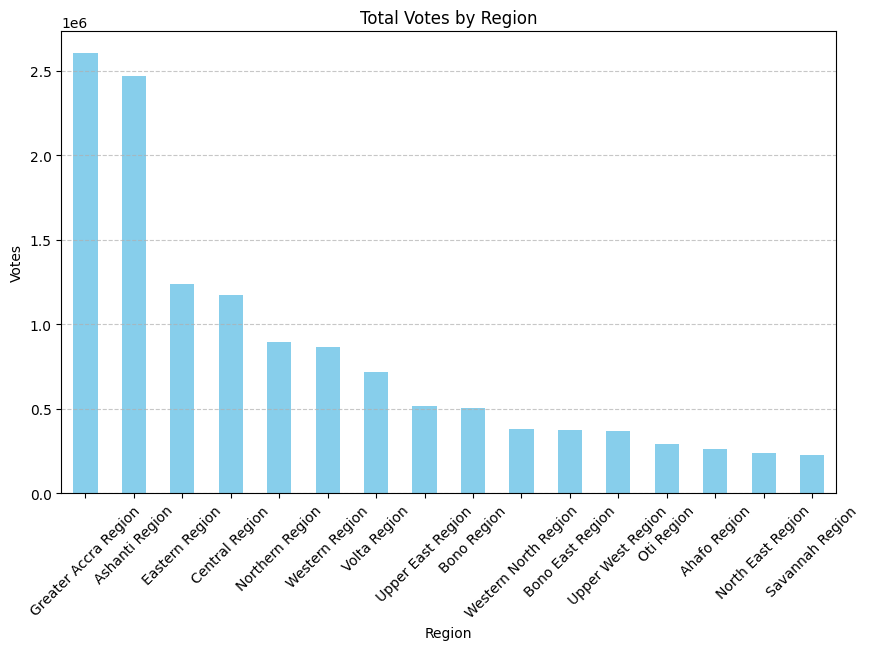

In [66]:
plt.figure(figsize=(10, 6))
regional_votes.plot(kind='bar', color='skyblue')
plt.title('Total Votes by Region')
plt.ylabel('Votes')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [67]:
# Candidate with highest votes per region
highest_votes_region = data.loc[data.groupby('region')['votes'].idxmax()]
highest_votes_region[['region', 'presidential_candidate', 'votes']]

,region,presidential_candidate,votes
12,Ahafo Region,Nana Addo Dankwa Akufo-Addo,145584
96,Ashanti Region,Nana Addo Dankwa Akufo-Addo,1795824
133,Bono East Region,John Dramani Mahama,213694
60,Bono Region,Nana Addo Dankwa Akufo-Addo,292604
24,Central Region,Nana Addo Dankwa Akufo-Addo,613804
144,Eastern Region,Nana Addo Dankwa Akufo-Addo,752061
169,Greater Accra Region,John Dramani Mahama,1326489
36,North East Region,Nana Addo Dankwa Akufo-Addo,122742
121,Northern Region,John Dramani Mahama,476550
73,Oti Region,John Dramani Mahama,181021


In [68]:
# Total votes and percentage
candidate_votes = data.groupby('presidential_candidate')['votes'].sum().sort_values(ascending=False)
candidate_votes

presidential_candidate
Nana Addo Dankwa Akufo-Addo       6730587
John Dramani Mahama               6213182
Christian Kwabena Andrews          105548
Ivor Kobina Greenstreet             12200
David Asibi Ayindenaba Apasera      10882
Alfred Kwame Asiedu Walker           9704
Percival Kofi Akpaloo                7683
Hassan Ayariga                       7138
Brigitte Akosua Dzogbenuku           6849
Nana Konadu Agyeman-Rawlings         6549
Akua Donkor                          5574
Henry Herbert Lartey                 3564
Name: votes, dtype: int64

In [69]:
candidate_votes_percentage = ((candidate_votes / candidate_votes.sum()) * 100).round(2)
candidate_votes_percentage

presidential_candidate
Nana Addo Dankwa Akufo-Addo       51.30
John Dramani Mahama               47.36
Christian Kwabena Andrews          0.80
Ivor Kobina Greenstreet            0.09
David Asibi Ayindenaba Apasera     0.08
Alfred Kwame Asiedu Walker         0.07
Percival Kofi Akpaloo              0.06
Hassan Ayariga                     0.05
Brigitte Akosua Dzogbenuku         0.05
Nana Konadu Agyeman-Rawlings       0.05
Akua Donkor                        0.04
Henry Herbert Lartey               0.03
Name: votes, dtype: float64

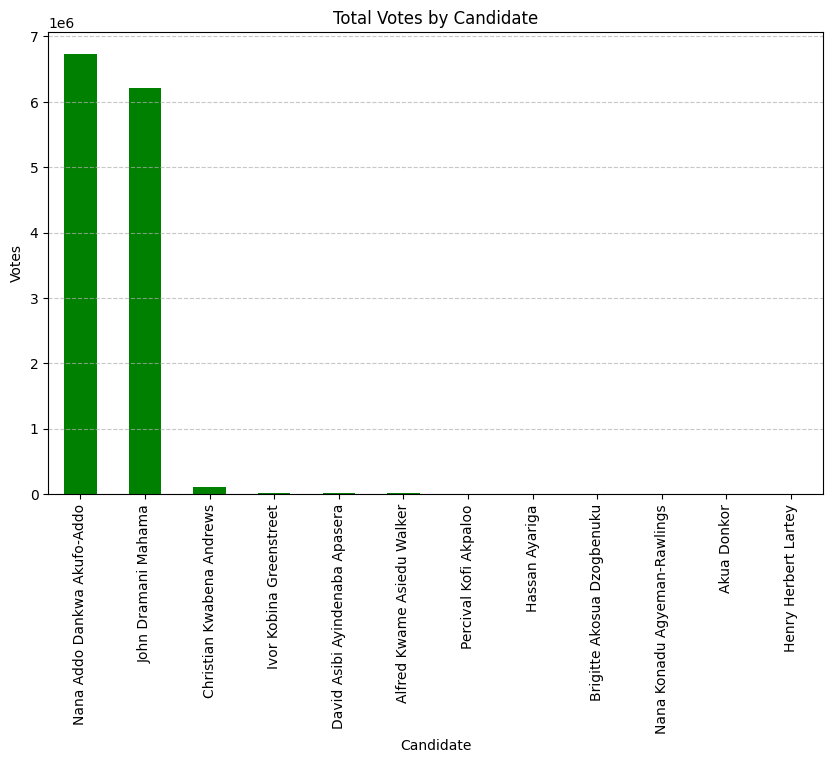

In [70]:
plt.figure(figsize=(10, 6))
candidate_votes.plot(kind='bar', color='green')
plt.title('Total Votes by Candidate')
plt.ylabel('Votes')
plt.xlabel('Candidate')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [71]:
# Outlier regions for each candidate
outliers = data.groupby(['presidential_candidate', 'region'])['votes'].sum().reset_index()
outliers = outliers[outliers['votes'] > outliers['votes'].quantile(0.95)]  # Top 5% votes
outliers

,presidential_candidate,region,votes
129,John Dramani Mahama,Ashanti Region,653149
132,John Dramani Mahama,Central Region,538829
133,John Dramani Mahama,Eastern Region,470999
134,John Dramani Mahama,Greater Accra Region,1326489
136,John Dramani Mahama,Northern Region,476550
141,John Dramani Mahama,Volta Region,606508
145,Nana Addo Dankwa Akufo-Addo,Ashanti Region,1795824
148,Nana Addo Dankwa Akufo-Addo,Central Region,613804
149,Nana Addo Dankwa Akufo-Addo,Eastern Region,752061
150,Nana Addo Dankwa Akufo-Addo,Greater Accra Region,1253179


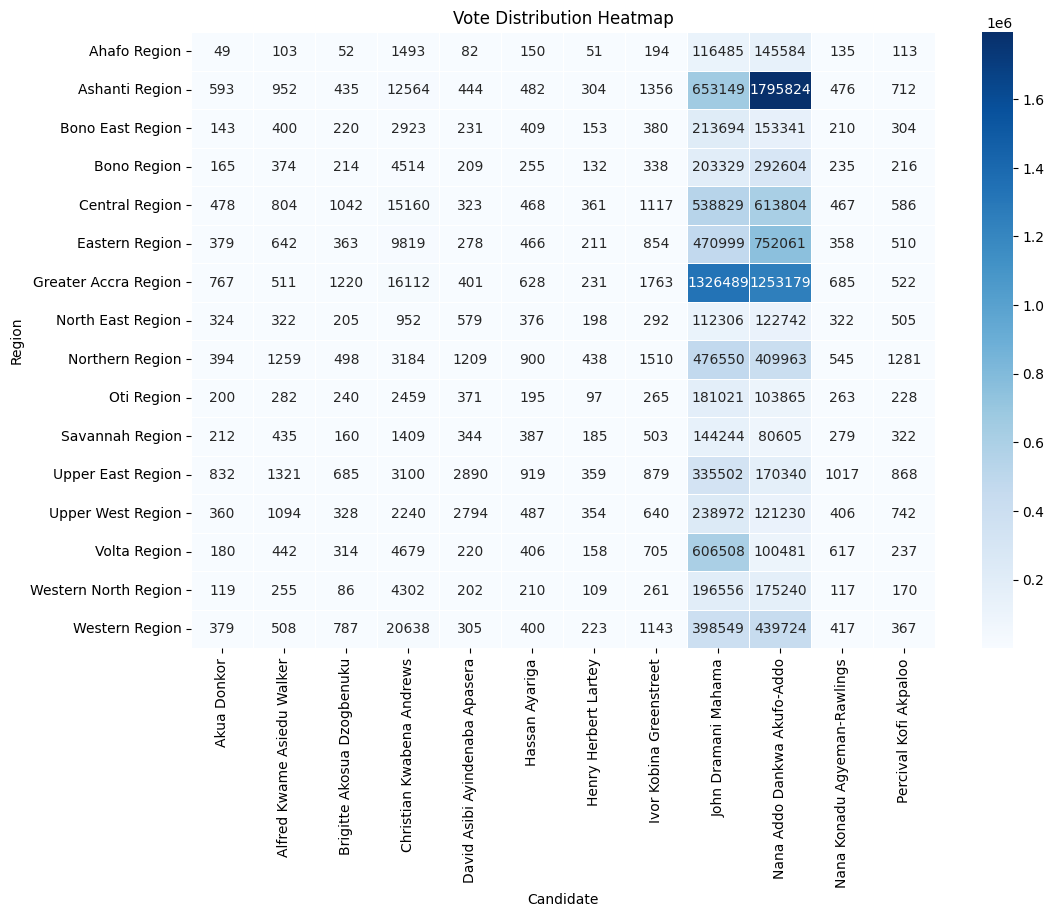

In [72]:
# Prepare data for heatmap
heatmap_data = data.pivot_table(index='region', columns='presidential_candidate', values='votes', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5)
plt.title('Vote Distribution Heatmap')
plt.ylabel('Region')
plt.xlabel('Candidate')
plt.show()

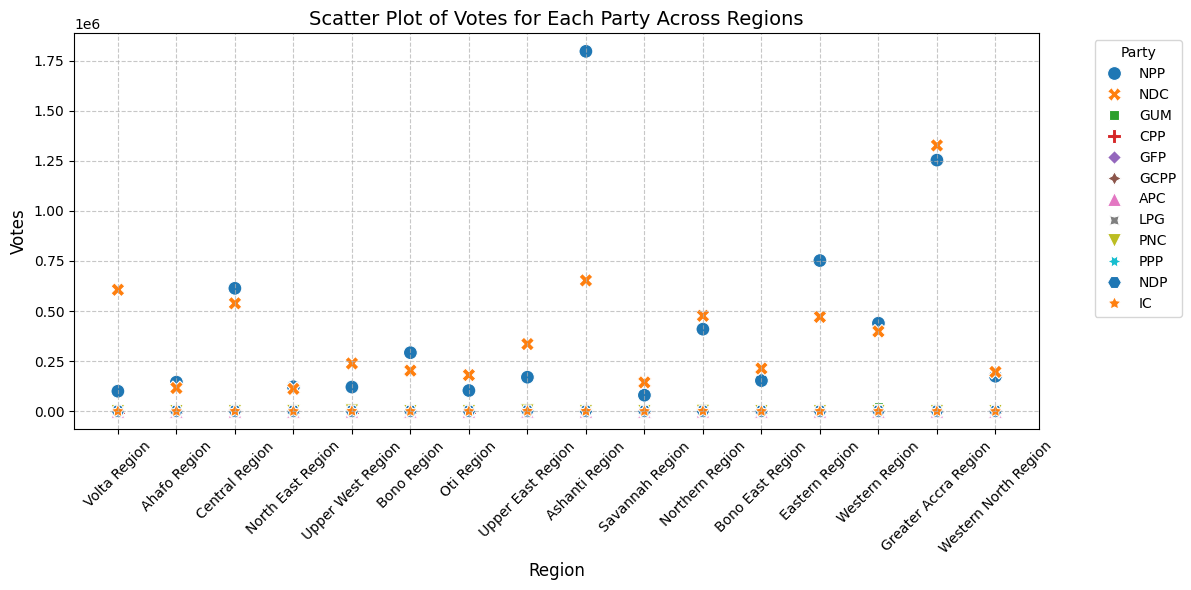

In [73]:
# Creating a scatter plot showing votes by party and region
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='region', y='votes', hue='party_initials', style='party_initials', palette='tab10',s=100
)
plt.title('Scatter Plot of Votes for Each Party Across Regions', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Votes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

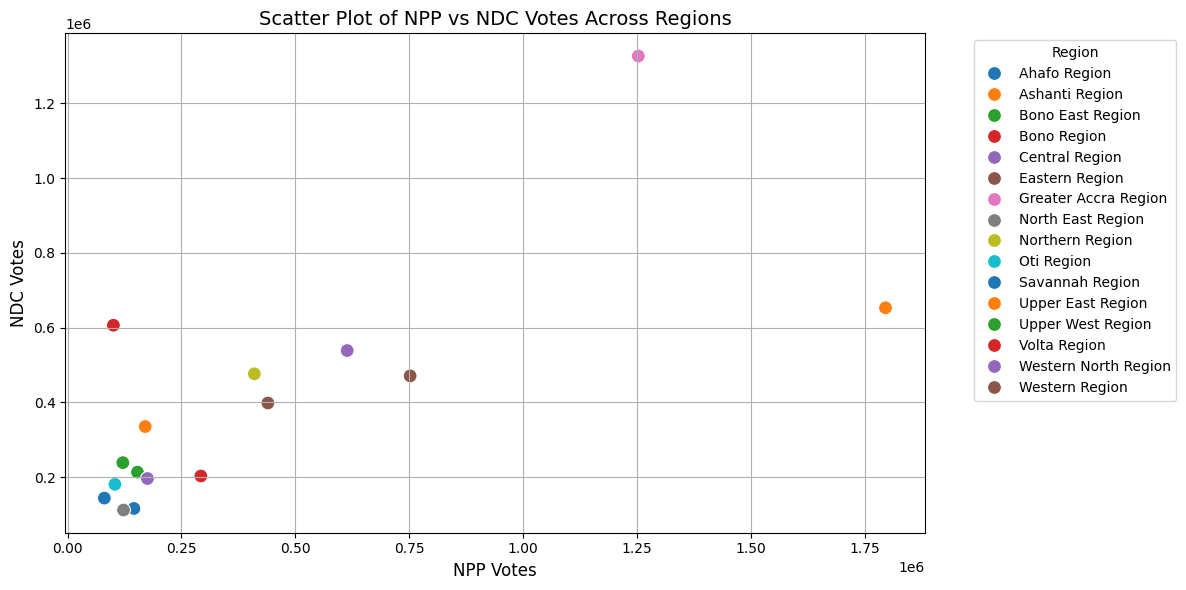

In [74]:
# Creating a scatter plot showing NPP vs NDC votes across regions
npp_ndc_data = data[data['party_initials'].isin(['NPP', 'NDC'])]
scatter_data = npp_ndc_data.pivot(index='region', columns='party_initials', values='votes').reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(data=scatter_data, x='NPP', y='NDC', hue='region', palette='tab10', s=100)
plt.title('Scatter Plot of NPP vs NDC Votes Across Regions', fontsize=14)
plt.xlabel('NPP Votes', fontsize=12)
plt.ylabel('NDC Votes', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
# Filtering data for the top 2 candidates
top_2_candidates = data[data['presidential_candidate'].isin(candidate_votes.nlargest(2).index)]

# Compare total votes for top 2 candidates across regions
top_2_performance = top_2_candidates.pivot_table(index='region', columns='presidential_candidate', values='votes', aggfunc='sum', fill_value=0)
top_2_performance

presidential_candidate,John Dramani Mahama,Nana Addo Dankwa Akufo-Addo
region,,
Ahafo Region,116485,145584
Ashanti Region,653149,1795824
Bono East Region,213694,153341
Bono Region,203329,292604
Central Region,538829,613804
Eastern Region,470999,752061
Greater Accra Region,1326489,1253179
North East Region,112306,122742
Northern Region,476550,409963


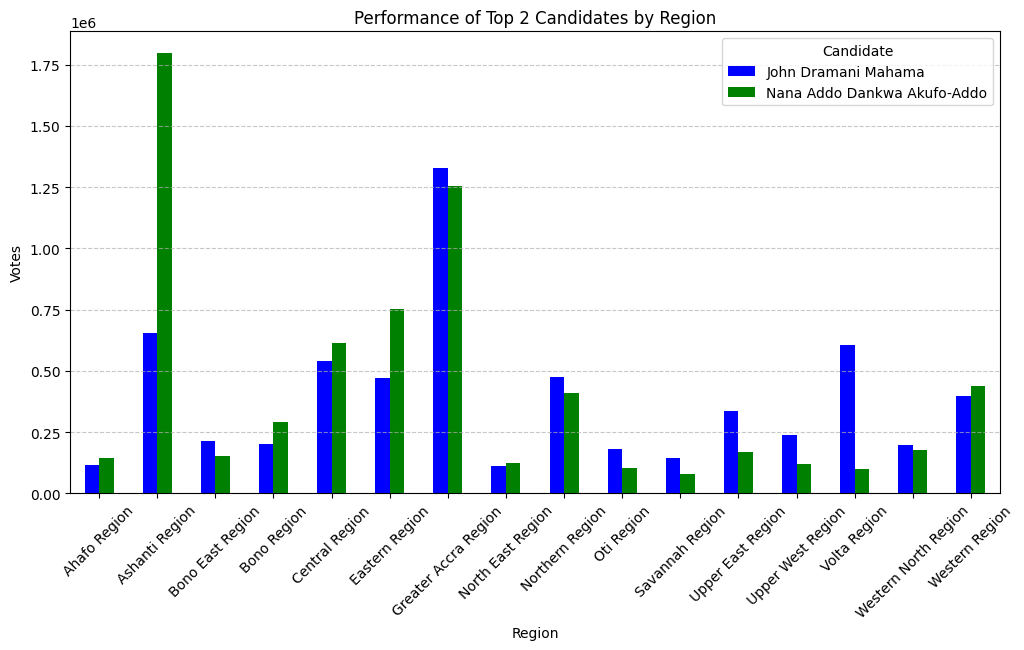

In [76]:
top_2_performance.plot(kind='bar', figsize=(12, 6), color=['blue', 'green'])
plt.title('Performance of Top 2 Candidates by Region')
plt.ylabel('Votes')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Candidate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [77]:
# Regions where each party received its highest votes
party_popular_regions = data.loc[data.groupby('full_party_name')['votes'].idxmax()]
party_popular_regions[['full_party_name', 'region', 'votes']]

,full_party_name,region,votes
90,All People's Party,Upper East Region,919
171,Convention People's Party,Greater Accra Region,1763
88,Ghana Freedom Party,Upper East Region,832
158,Ghana Union Movement,Western Region,20638
125,Great Consolidated Popular Party,Northern Region,438
95,Independent Candidate,Upper East Region,1321
127,Liberal Party of Ghana,Northern Region,1281
169,National Democratic Congress,Greater Accra Region,1326489
94,National Democratic Party,Upper East Region,1017
96,New Patriotic Party,Ashanti Region,1795824


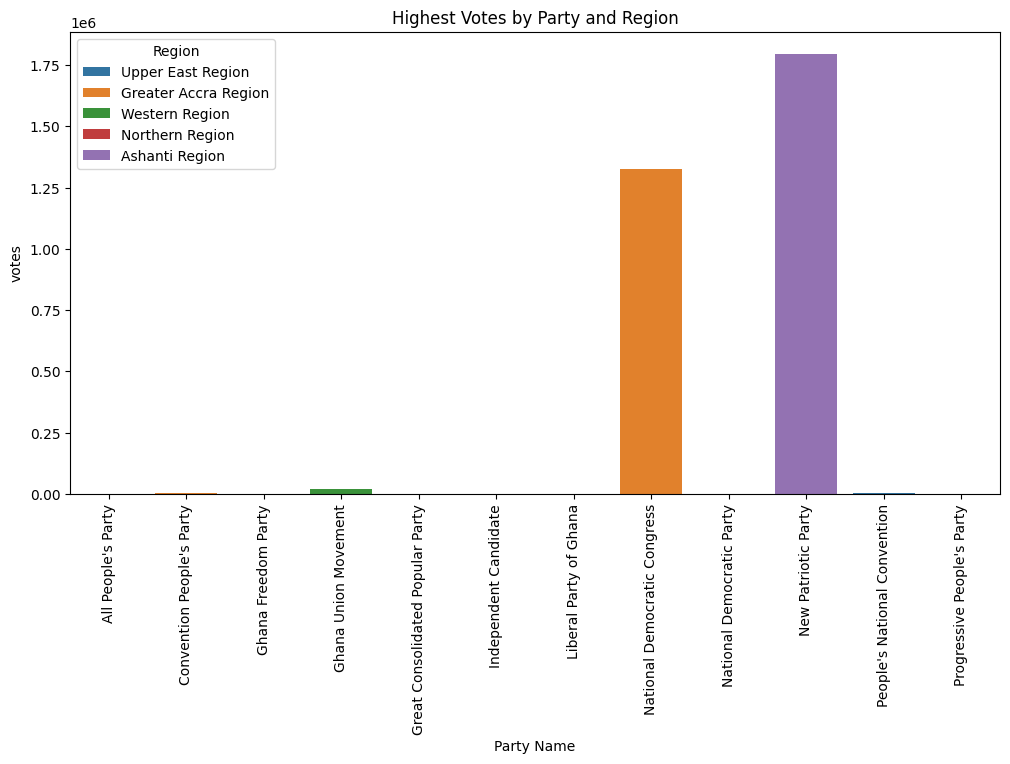

In [78]:
plt.figure(figsize=(12, 6))
sns.barplot(x='full_party_name', y='votes', data=party_popular_regions, hue='region')
plt.title('Highest Votes by Party and Region')
plt.xlabel('Party Name')
plt.ylabel('votes')
plt.xticks(rotation=90)
plt.legend(title='Region')
plt.show()

In [79]:
# Regions where each party received its lowest votes
party_least_popular_regions = data.loc[data.groupby('full_party_name')['votes'].idxmin()]
party_least_popular_regions[['full_party_name', 'region', 'votes']]

,full_party_name,region,votes
18,All People's Party,Ahafo Region,150
15,Convention People's Party,Ahafo Region,194
16,Ghana Freedom Party,Ahafo Region,49
38,Ghana Union Movement,North East Region,952
17,Great Consolidated Popular Party,Ahafo Region,51
23,Independent Candidate,Ahafo Region,103
19,Liberal Party of Ghana,Ahafo Region,113
37,National Democratic Congress,North East Region,112306
190,National Democratic Party,Western North Region,117
108,New Patriotic Party,Savannah Region,80605


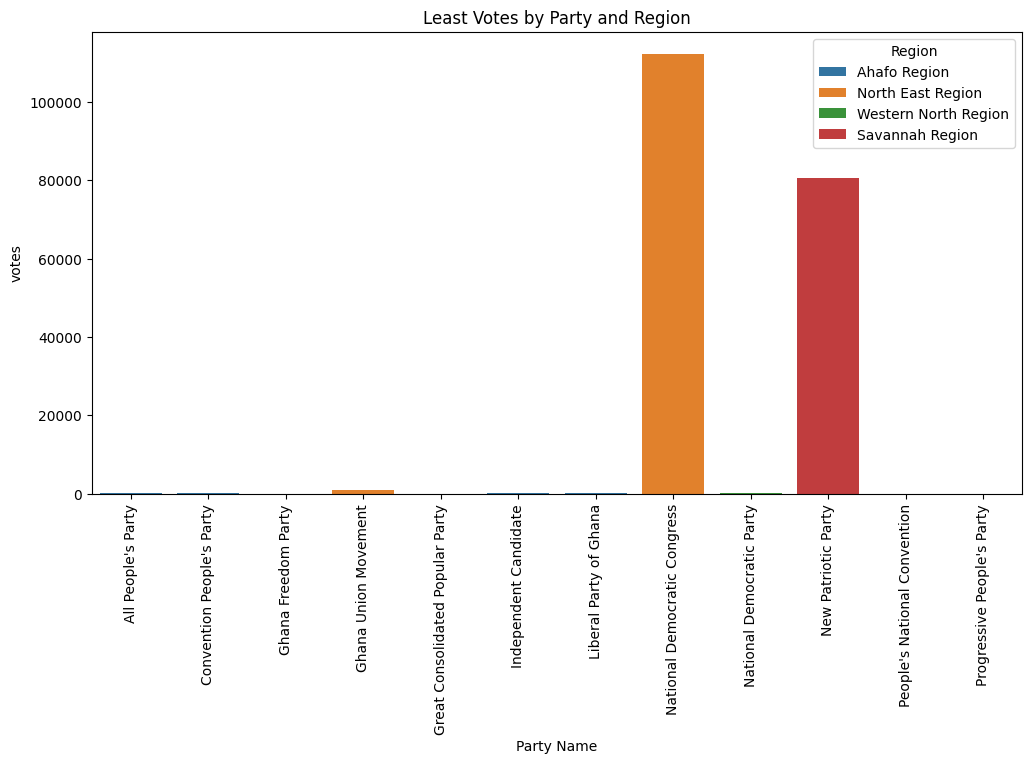

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(x='full_party_name', y='votes', data=party_least_popular_regions, hue='region')
plt.title('Least Votes by Party and Region')
plt.xlabel('Party Name')
plt.ylabel('votes')
plt.xticks(rotation=90)
plt.legend(title='Region')
plt.show()

In [81]:
# Total votes per party
party_votes = data.groupby('full_party_name')['votes'].sum().sort_values(ascending=False)
party_votes

full_party_name
New Patriotic Party                 6730587
National Democratic Congress        6213182
Ghana Union Movement                 105548
Convention People's Party             12200
People's National Convention          10882
Independent Candidate                  9704
Liberal Party of Ghana                 7683
All People's Party                     7138
Progressive People's Party             6849
National Democratic Party              6549
Ghana Freedom Party                    5574
Great Consolidated Popular Party       3564
Name: votes, dtype: int64

In [82]:
# Determine overall winner
overall_winner = candidate_votes.idxmax()
f"The overall winner is {overall_winner} with {candidate_votes.max()} votes."

'The overall winner is Nana Addo Dankwa Akufo-Addo with 6730587 votes.'

In [83]:
# Margin of victory in each region
region_margin = data.groupby('region').apply(
    lambda x: x.sort_values(
        by='votes', ascending=False).iloc[0]['votes'] - x.sort_values(by='votes', ascending=False).iloc[1]['votes']
)
region_margin

region
Ahafo Region              29099
Ashanti Region          1142675
Bono East Region          60353
Bono Region               89275
Central Region            74975
Eastern Region           281062
Greater Accra Region      73310
North East Region         10436
Northern Region           66587
Oti Region                77156
Savannah Region           63639
Upper East Region        165162
Upper West Region        117742
Volta Region             506027
Western North Region      21316
Western Region            41175
dtype: int64

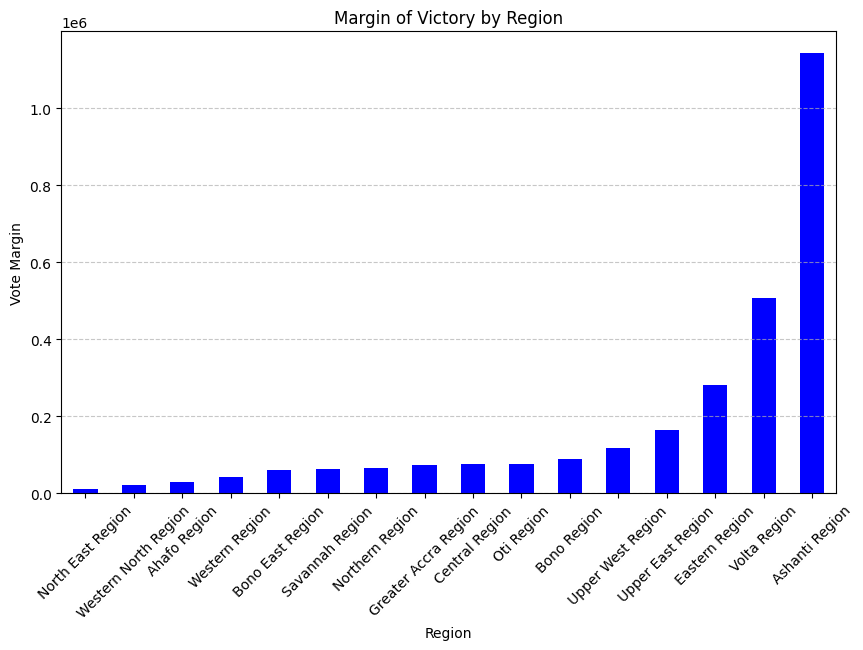

In [84]:
plt.figure(figsize=(10, 6))
region_margin.sort_values().plot(kind='bar', color='blue')
plt.title('Margin of Victory by Region')
plt.ylabel('Vote Margin')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

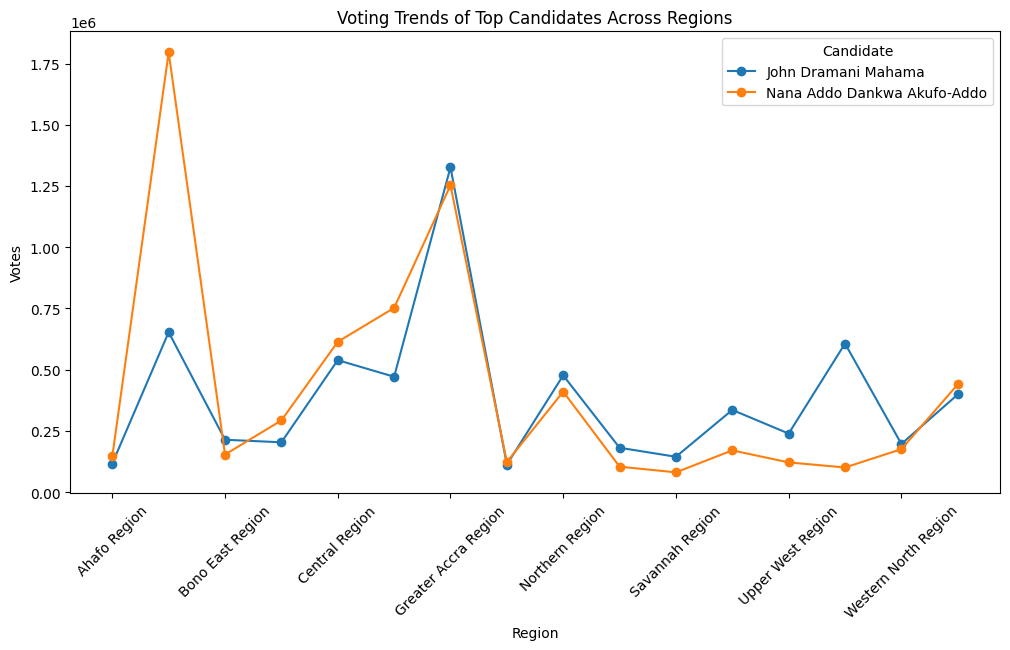

In [85]:
# Voting trends for top candidates
top_candidates_trends = top_2_candidates.groupby(['region', 'presidential_candidate'])['votes'].sum().unstack()
top_candidates_trends.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Voting Trends of Top Candidates Across Regions')
plt.ylabel('Votes')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Candidate')
plt.show()

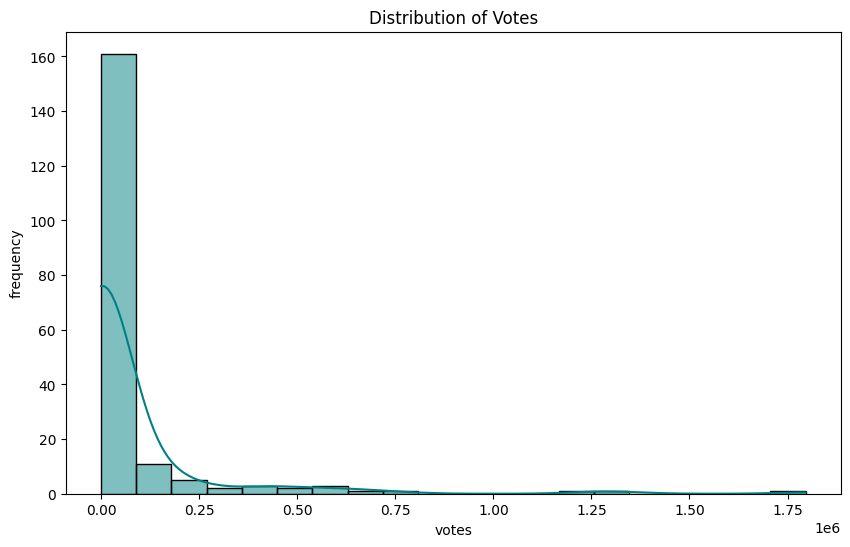

In [86]:
# Distribution of votes
plt.figure(figsize=(10, 6))
sns.histplot(data['votes'], bins=20, kde=True, color='teal')
plt.title('Distribution of Votes')
plt.xlabel('votes')
plt.ylabel('frequency')
plt.show()

In [87]:
# Identifying the top 2 candidates based on total votes across all regions
total_votes = data.groupby('presidential_candidate')['votes'].sum().sort_values(ascending=False)
top_candidates = total_votes.head(2).index
strongholds = {}
weak_regions = {}

# Determining the stronghold regions for the top candidates
for candidate in top_candidates:
    candidate_data = data[data['presidential_candidate'] == candidate]
    strongholds[candidate] = candidate_data.loc[candidate_data['votes'].idxmax(), 'region']
print("Strongholds for Top Candidates:")
for candidate, region in strongholds.items():
    print(f"{candidate}: {region}")

Strongholds for Top Candidates:
Nana Addo Dankwa Akufo-Addo: Ashanti Region
John Dramani Mahama: Greater Accra Region


In [88]:
# Determining the weak regions for the top candidates
for candidate in top_candidates:
    candidate_data = data[data['presidential_candidate'] == candidate]
    weak_regions[candidate] = candidate_data.loc[candidate_data['votes'].idxmin(), 'region']
print("Weak Regions for Top Candidates:")
for candidate, region in weak_regions.items():
    print(f"{candidate}: {region}")

Weak Regions for Top Candidates:
Nana Addo Dankwa Akufo-Addo: Savannah Region
John Dramani Mahama: North East Region


In [89]:
# Filtering data for NPP and NDC
npp_ndc_data = data[data['party_initials'].isin(['NPP', 'NDC'])]

# Pivoting the data to calculate vote disparities
npp_ndc_pivot = npp_ndc_data.pivot_table(
    index='region',
    columns='party_initials',
    values='votes',
    aggfunc='sum'
)
# Calculating the vote disparity (NPP votes - NDC votes)
npp_ndc_pivot['vote_disparity'] = npp_ndc_pivot['NPP'] - npp_ndc_pivot['NDC']
npp_ndc_pivot[['NPP', 'NDC', 'vote_disparity']]

party_initials,NPP,NDC,vote_disparity
region,,,
Ahafo Region,145584,116485,29099
Ashanti Region,1795824,653149,1142675
Bono East Region,153341,213694,-60353
Bono Region,292604,203329,89275
Central Region,613804,538829,74975
Eastern Region,752061,470999,281062
Greater Accra Region,1253179,1326489,-73310
North East Region,122742,112306,10436
Northern Region,409963,476550,-66587


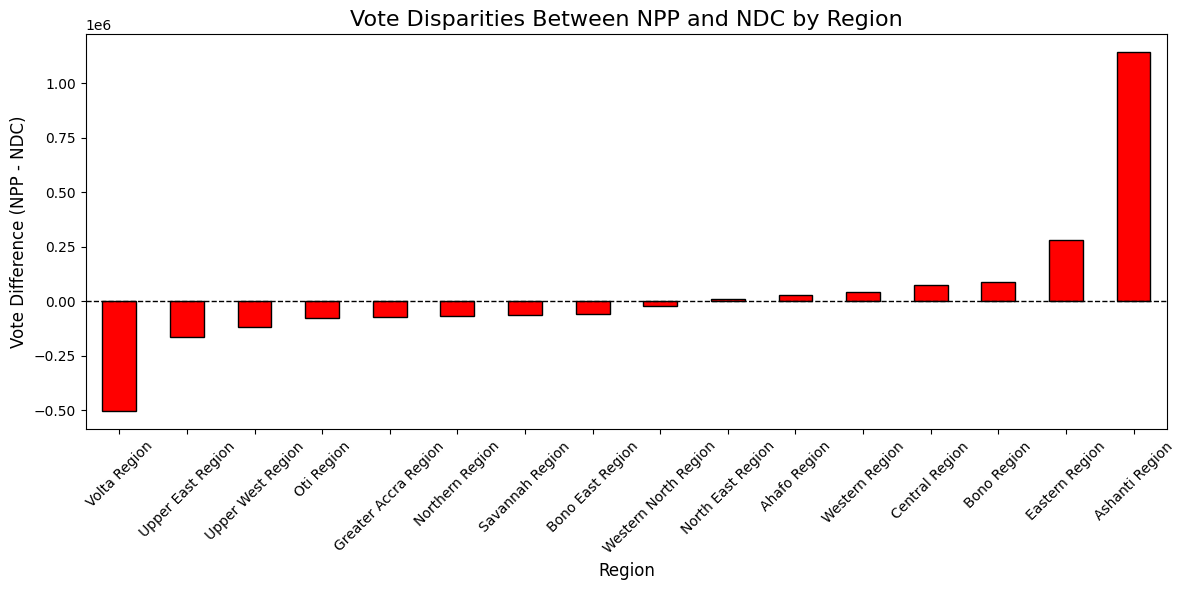

In [90]:
plt.figure(figsize=(12, 6))
npp_ndc_pivot['vote_disparity'].sort_values().plot(kind='bar', color='red', edgecolor='black')
plt.title('Vote Disparities Between NPP and NDC by Region', fontsize=16)
plt.ylabel('Vote Difference (NPP - NDC)', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


# Key Insights

1. Pivotal Regions: Ashanti and Greater Accra are crucial for election outcomes due to their large voter bases.
2. Two-Party Dominance: NPP and NDC collectively accounted for over 98% of votes, leaving minor parties with minimal impact.
3. Regional Polarization: Ashanti and Eastern favor NPP, while Greater Accra and Volta favor NDC.
4. Swing Regions: Ahafo, North East, and Western are battlegrounds where targeted efforts could sway undecided voters.
5. Voter Turnout Impact: High voter turnout in regions like Greater Accra and Ashanti significantly affects overall election outcomes.

# Recommendations

1. Focus on Strongholds:
NPP should consolidate Ashanti and Eastern while improving performance in Greater Accra.
NDC should strengthen support in Volta and Greater Accra.

2. Engage Swing Regions:
Both parties should prioritize tailored campaigns in Ahafo, North East, Western North, and Western.

3. Leverage Minor Parties:
Explore collaborations or endorsements from influential minor parties like GUM to increase appeal.

4. Increase Voter Turnout:
Encourage turnout in low-participation regions, such as Savannah and Oti.

# Conclusion

The 2020 Ghanaian Presidential Election underscores the dominance of the NPP and NDC, with well-defined regional preferences shaping outcomes. Minor parties had limited influence, reaffirming the two-party system. This analysis provides data-driven insights and recommendations to refine future electoral strategies, focusing on pivotal regions and swing areas to enhance political engagement and outcomes.